In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os,sys
from pandas.plotting import scatter_matrix 

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


from scripts.utils import (
    detect_outliers_iqr,
    plot_time_series, 
    plot_correlation_analysis, 
    plot_wind_analysis, 
    plot_temperature_analysis, 
    plot_histograms, 
    calculate_z_scores, 
    plot_bubble_chart, 
    clean_dataset
)


Reading The Data from CSV

In [2]:
serra_df = pd.read_csv('../Data/sierraleone-bumbuna.csv')
serra_df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
5,2021-10-30 00:06,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7,NaN
6,2021-10-30 00:07,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7,NaN
7,2021-10-30 00:08,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7,NaN
8,2021-10-30 00:09,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7,NaN
9,2021-10-30 00:10,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7,NaN


In [3]:
serra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

cheaking missing values

In [4]:
serra_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Checking for wrong entries like symbols -,?,#,*,etc

In [5]:
for col in serra_df.columns:
    print('{} : {}'.format(col,serra_df[col].unique()))

Timestamp : ['2021-10-30 00:01' '2021-10-30 00:02' '2021-10-30 00:03' ...
 '2022-10-29 23:58' '2022-10-29 23:59' '2022-10-30 00:00']
GHI : [-7.000e-01 -6.000e-01 -8.000e-01 ...  1.381e+03  1.394e+03  1.329e+03]
DNI : [-1.00e-01  0.00e+00 -2.00e-01 ...  9.29e+02 -5.20e+00  9.05e+02]
DHI : [ -0.8  -0.9  -1.  ... 622.5 675.6 682.1]
ModA : [0.000e+00 1.000e-01 2.000e-01 ... 1.294e+03 1.214e+03 1.305e+03]
ModB : [0.000e+00 1.000e-01 2.000e-01 ... 1.354e+03 1.339e+03 1.238e+03]
Tamb : [21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8 22.9 23.  23.1 23.2
 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24.3 24.4 24.5 24.6
 24.7 24.8 24.9 25.  25.1 25.2 25.3 25.4 25.6 25.5 25.7 25.8 25.9 26.
 26.1 26.2 26.4 26.5 26.3 26.6 26.8 26.9 27.  27.1 27.2 27.4 27.5 27.6
 27.7 27.8 27.9 28.  28.1 28.2 28.5 28.7 28.4 28.3 28.6 28.8 29.  29.2
 29.1 29.4 29.6 29.5 29.3 28.9 29.7 30.  30.1 29.9 29.8 30.2 30.3 30.4
 27.3 26.7 21.8 21.7 21.6 30.5 30.7 31.  31.3 31.5 31.4 31.2 31.1 30.9
 30.8 30.6 31.6 31.7

First filtering the Dataframe to include only numeric columns and then computing the summary statistics.

In [6]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
summary_statistics.head(100)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Computing summary statistics for all numeric columns

In [7]:
summary_statistics =  serra_df.describe()
summary_statistics

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


mean

In [8]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
mean = summary_statistics.mean()
mean.round(2)

GHI              65992.48
DNI              65872.48
DHI              65870.95
ModA             65997.20
ModB             65988.60
Tamb             65720.09
RH               65757.58
WS               65703.05
WSgust           65703.93
WSstdev          65700.72
WD               65825.37
WDstdev          65716.41
BP               66450.12
Cleaning         65700.13
Precipitation    65700.31
TModA            65727.43
TModB            65727.26
Comments             0.00
dtype: float64

median

In [9]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
median = summary_statistics.median()
median.round(3)

GHI              250.226
DNI              111.688
DHI              136.333
ModA             253.770
ModB             243.502
Tamb              25.810
RH                82.424
WS                 1.193
WSgust             1.654
WSstdev            0.382
WD               147.272
WDstdev            7.354
BP               999.938
Cleaning           0.000
Precipitation      0.002
TModA             29.552
TModB             29.747
Comments           0.000
dtype: float64

range

In [10]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
range = summary_statistics.max() - summary_statistics.min()
range.round(3)

GHI              525619.500
DNI              525607.800
DHI              525617.900
ModA             525600.000
ModB             525600.000
Tamb             525595.601
RH               525590.100
WS               525600.000
WSgust           525600.000
WSstdev          525600.000
WD               525600.000
WDstdev          525600.000
BP               525597.896
Cleaning         525600.000
Precipitation    525600.000
TModA            525589.300
TModB            525588.900
Comments              0.000
dtype: float64

variance

In [11]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
variance = summary_statistics.var()
variance

GHI              3.448826e+10
DNI              3.450612e+10
DHI              3.450634e+10
ModA             3.448755e+10
ModB             3.448883e+10
Tamb             3.452890e+10
RH               3.452327e+10
WS               3.453146e+10
WSgust           3.453133e+10
WSstdev          3.453181e+10
WD               3.451311e+10
WDstdev          3.452946e+10
BP               3.441949e+10
Cleaning         3.453190e+10
Precipitation    3.453187e+10
TModA            3.452780e+10
TModB            3.452783e+10
Comments                  NaN
dtype: float64

standard_deviation

In [12]:
numeric_columns = serra_df.select_dtypes(include=['number'])
summary_statistics = numeric_columns.describe()
standard_deviation = summary_statistics.std()
standard_deviation.round(3)

GHI              185710.146
DNI              185758.238
DHI              185758.827
ModA             185708.237
ModB             185711.685
Tamb             185819.545
RH               185804.398
WS               185826.431
WSgust           185826.076
WSstdev          185827.371
WD               185777.044
WDstdev          185821.033
BP               185524.895
Cleaning         185827.610
Precipitation    185827.538
TModA            185816.580
TModB            185816.647
Comments                NaN
dtype: float64

Data Quality Check


Missing Values

In [13]:
missing_values = serra_df.isna().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Check for negative values in columns that should only have positive values

In [14]:
incorrect_entries = {
    'GHI': (serra_df['GHI'] < 0).sum(),
    'DNI': (serra_df['DNI'] < 0).sum(),
    'DHI': (serra_df['DHI'] < 0).sum(),
}

print("\nIncorrect Values:")
for key, value in incorrect_entries.items():
    print(f' {key} : {value}')


Incorrect Values:
 GHI : 261135
 DNI : 266352
 DHI : 263128


Defining a function to calculate IQR and detect outliers

In [15]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

outliers = {
    'ModA': detect_outliers_iqr(serra_df['ModA']),
    'ModB': detect_outliers_iqr(serra_df['ModB']),
    'WS': detect_outliers_iqr(serra_df['WS']),
    'WSgust': detect_outliers_iqr(serra_df['WSgust'])
}

print("\nOutliers Detected:")
for key, value in outliers.items():
    print(f' {key} : {value}')


Outliers Detected:
 ModA : 21017
 ModB : 20613
 WS : 3169
 WSgust : 3665


Time series analysis

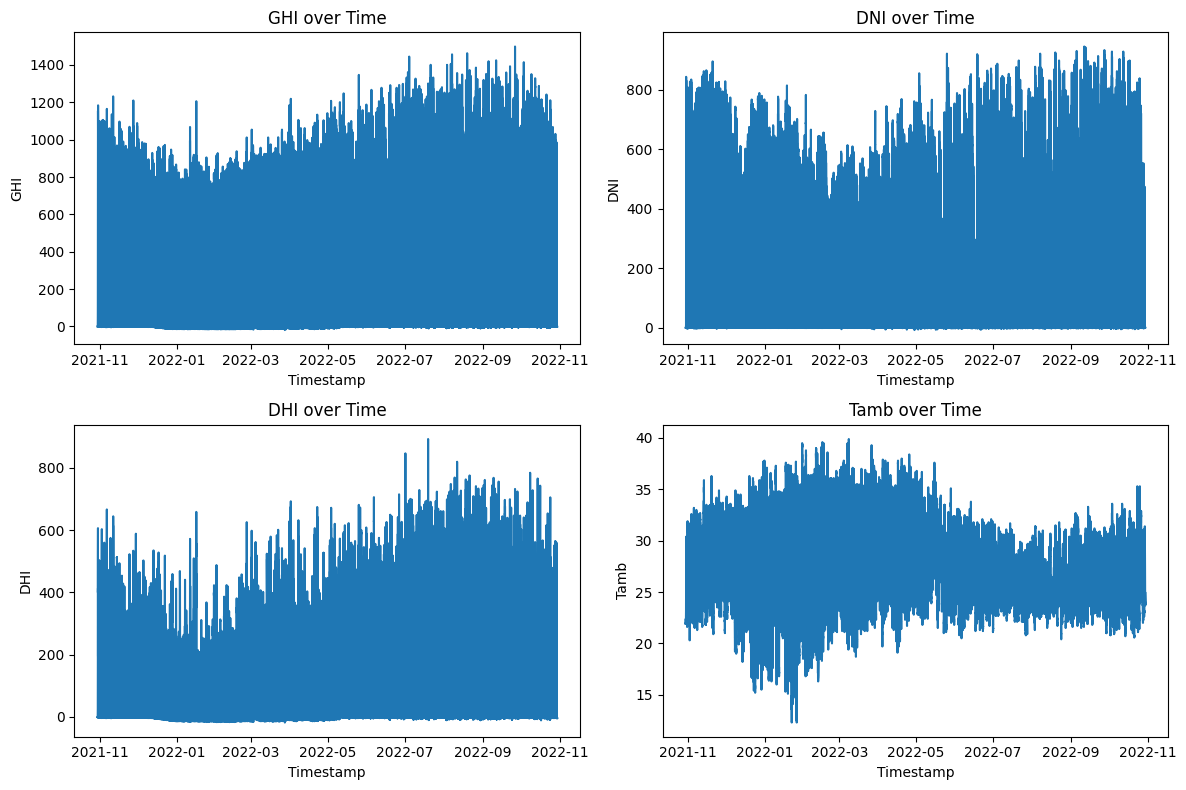

In [16]:
serra_df['Timestamp'] = pd.to_datetime(serra_df['Timestamp'])


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(x='Timestamp', y='GHI', data=serra_df)
plt.title('GHI over Time')


plt.subplot(2, 2, 2)
sns.lineplot(x='Timestamp', y='DNI', data=serra_df)
plt.title('DNI over Time')


plt.subplot(2, 2, 3)
sns.lineplot(x='Timestamp', y='DHI', data=serra_df)
plt.title('DHI over Time')


plt.subplot(2, 2, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=serra_df)
plt.title('Tamb over Time')

plt.tight_layout()
plt.show()

correlation analysis plots

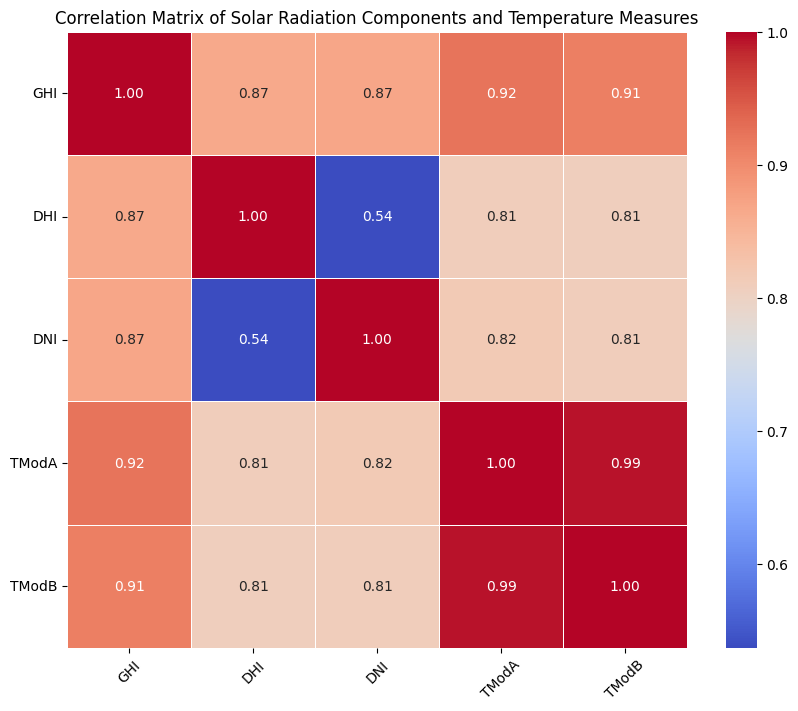

In [17]:
columns_of_interest = ['GHI', 'DHI', 'DNI', 'TModA', 'TModB']
dataset_subset = serra_df[columns_of_interest]


correlation_matrix = dataset_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation Components and Temperature Measures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Wind Analysis

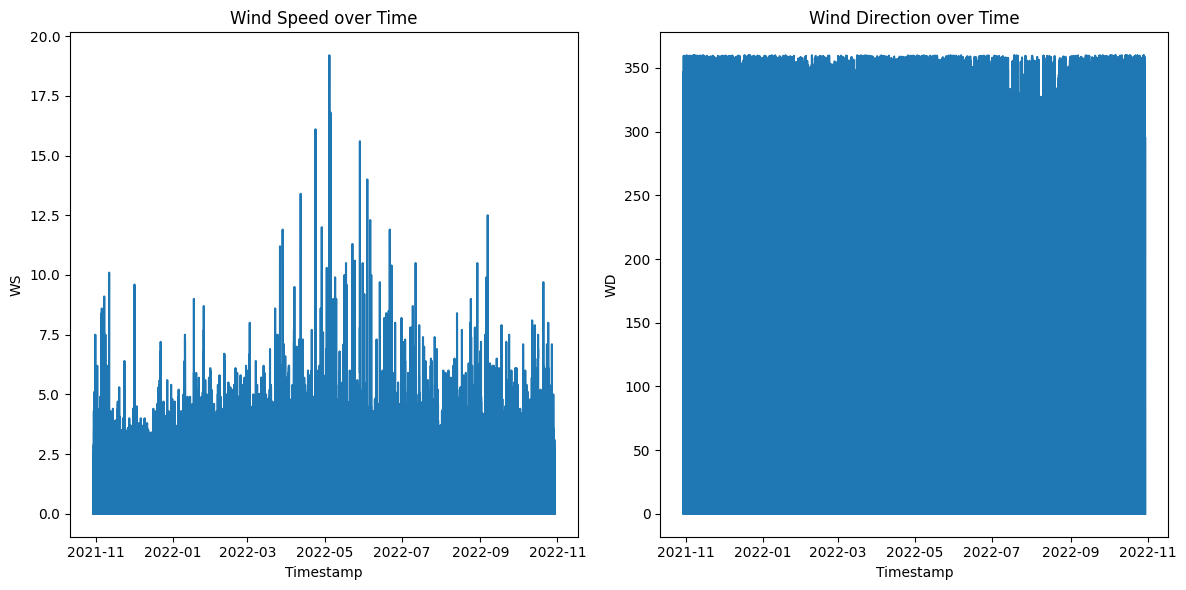

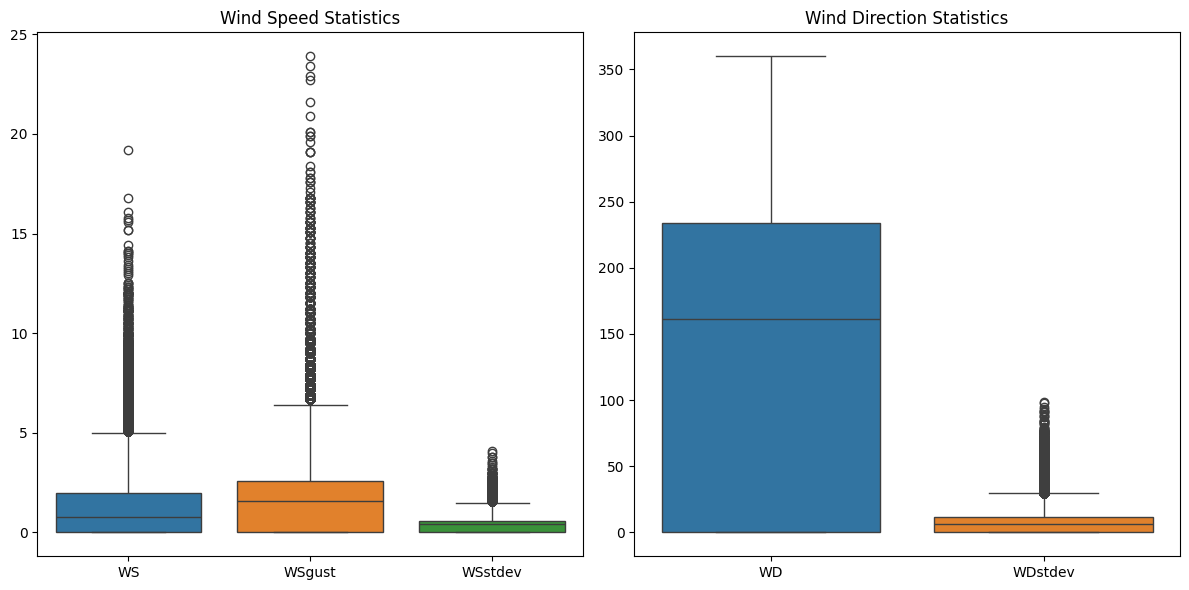

In [18]:
wind_columns = ['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']
dataset_wind = serra_df[wind_columns]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Timestamp', y='WS', data=serra_df)
plt.title('Wind Speed over Time')


plt.subplot(1, 2, 2)
sns.lineplot(x='Timestamp', y='WD', data=serra_df)
plt.title('Wind Direction over Time')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_wind[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Statistics')


plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_wind[['WD', 'WDstdev']], orient='v')
plt.title('Wind Direction Statistics')

plt.tight_layout()
plt.show()

Tempurature Analysis plot

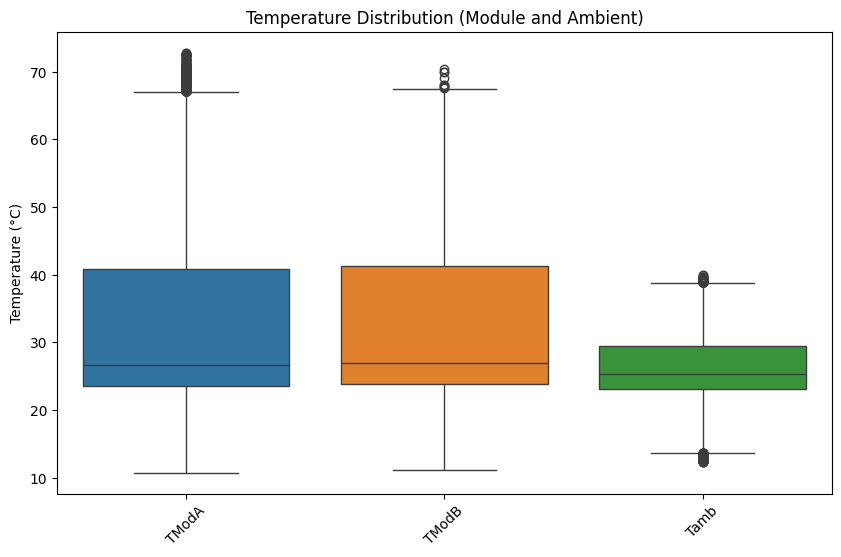

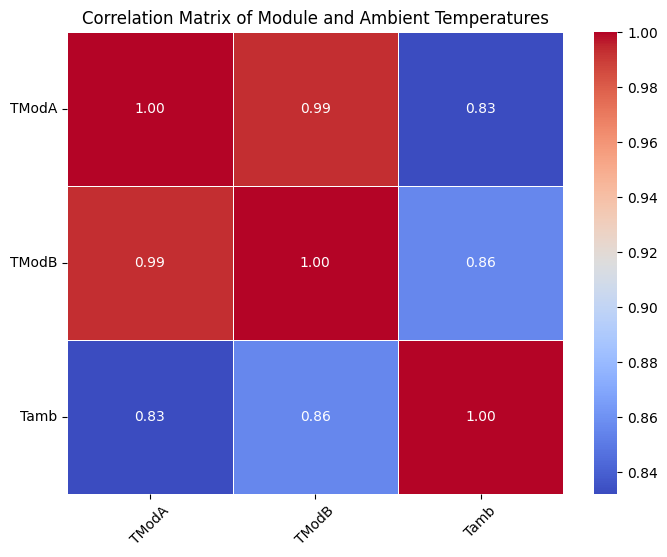

In [19]:
temperature_columns = ['TModA', 'TModB', 'Tamb']
dataset_temperatures = serra_df[temperature_columns]


plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_temperatures, orient='v')
plt.title('Temperature Distribution (Module and Ambient)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(dataset_temperatures.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Module and Ambient Temperatures')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()